In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pprint

sys.path.append('..')
from utils import plot_vectors

In [2]:
pp = pprint.PrettyPrinter(indent=4)

In [6]:
def basic_hash_table(val_list, n_buckets):

    def hash_func(val):
        return int(val) % n_buckets
    
    hash_table = {i: [] for i in range(n_buckets)}
    for val in val_list:
        hash_val = hash_func(val)
        hash_table[hash_val].append(val)
    return hash_table

In [7]:
value_list = np.round(np.random.choice(range(100), size=20))
hash_table_example = basic_hash_table(value_list, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [10, 40],
    1: [91, 21, 31],
    2: [],
    3: [63],
    4: [],
    5: [85],
    6: [96],
    7: [37, 37, 47, 67, 27],
    8: [58, 28, 68],
    9: [29, 19, 79, 49]}


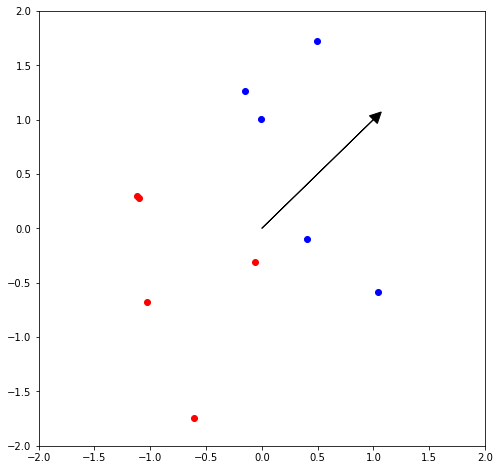

In [10]:
normal = np.array([[1, 1]])
fig, ax1 = plt.subplots(figsize=(8, 8))
plot_vectors([normal], axes=[2, 2], ax=ax1)

for i in range(10):
    v1 = np.array(np.random.uniform(-2, 2, 2))
    pos_neg = np.sign(np.dot(normal, v1.T)) 
    if pos_neg == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')

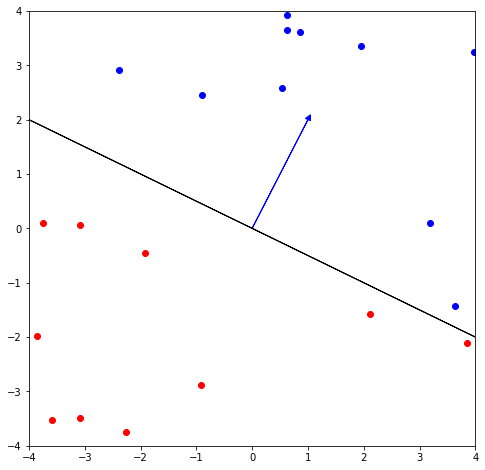

In [11]:
normal = np.array([[1, 2]])
plane = np.dot([[0, 1], [-1, 0]], normal.T).T  
fig, ax1 = plt.subplots(figsize=(8, 8))

plot_vectors([normal], colors=['b'], axes=[2, 2], ax=ax1)
plot_vectors(
    [plane * 4, plane * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)
for i in range(0, 20):
    v1 = np.array(np.random.uniform(-4, 4, 2))
    pos_neg = np.sign(np.dot(normal, v1.T))
    if pos_neg == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo')
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro')

In [12]:
normal = np.array([[1, 1]])
v1 = np.array([[1, 2]])
v2 = np.array([[-1, 1]])
v3 = np.array([[-2, -1]])

In [13]:
np.dot(normal, v1.T)

array([[3]])

In [14]:
np.dot(normal, v2.T)

array([[0]])

In [15]:
np.dot(normal, v3.T)

array([[-3]])

In [24]:
np.sign([3, 0, -3])

array([ 1,  0, -1])

In [18]:
def side_of_plane(normal, point):
    dotproduct = np.dot(normal, point.T)
    pos_neg = np.sign(dotproduct).item()
    return pos_neg

In [19]:
side_of_plane(normal, v1)

1

In [20]:
side_of_plane(normal, v2)

0

In [21]:
side_of_plane(normal, v3)

-1

In [31]:
not bool('False')

False

In [32]:
norm1 = np.array([[1, 1]])
norm2 = np.array([[-1, 1]])
norm3 = np.array([[-1, -1]])
norms = [norm1, norm2, norm3]

# Vector to search
v = np.array([[2, 2]])

In [33]:
def hash_multi_plane(norms, point):
    hash_value = 0
    for i, norm in enumerate(norms):
        sign = side_of_plane(norm, point)
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [34]:
hash_multi_plane(norms, v)

3

In [53]:
n_dims = 2
n_planes = 3
random_norms_matrix = np.random.normal(size=(n_planes, n_dims))
print(random_norms_matrix)

[[-1.34970592 -1.1589429 ]
 [ 0.18609532  0.21277165]
 [-1.38556213 -1.37517664]]


In [54]:
v = np.array([[2, 2]])

In [55]:
def side_of_norms_matrix(norms_matrix, point):
    dotproduct = np.dot(norms_matrix, point.T)
    sign = np.sign(dotproduct)
    return sign

In [56]:
sides_list = side_of_norms_matrix(random_norms_matrix, v)
sides_list

array([[-1.],
       [ 1.],
       [-1.]])

In [57]:
def hash_multi_norm_matrix(norm_matrix, point, n_planes):
    sides_matrix = side_of_norms_matrix(norm_matrix, point)
    hash_value = 0
    for i in range(n_planes):
        sign = sides_matrix[i].item()
        hash_i = 1 if sign >=0 else 0
        hash_value += 2**i * hash_i
    return hash_value

In [58]:
hash_multi_norm_matrix(random_norms_matrix, v, n_planes)

2

In [60]:
word_embedding = {'I': np.array([1, 0, 1]),
                  'love': np.array([-1, 0, 1]),
                  'learning': np.array([1, 1, 0])}
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0, 0, 0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
print(document_embedding)

[1 1 2]
